# KL Divergence Plots
We start by creating plots of the KL divergence between the true and estimated parameters for d=4, mx=100, my=100. We will look at the affect of varying the number of samples on the kl divergence for mle vs. bi_nce for varying values of K. We begin by plotting the loss over training for each experiment before plotting their KL divergence.

In [1]:
from slune import get_csv_saver
from matplotlib import pyplot as plt
from IPython.display import Image, display, HTML
import os

# Display loss plots
# -----------------------------------------------------------------------------------------------------------
def display_images(params, n_train_str, n_train_values, var_params, saver):
    html_str = "<table>"
    for i, p in enumerate(params):
        html_str += "<tr>"
        for j, n in enumerate(n_train_str):
            search = p + [n]
            if '--batch_size=max' in search:
                search.remove('--batch_size=max')
                search.append('--batch_size='+str(n_train_values[j]))
            all_params, values = saver.read(params = search, metric_name = 'kl_divergence', select_by ='min', avg=False)
            path = '../results/' + os.path.sep.join(all_params) + os.path.sep + 'loss.png'
            title = ' '.join(all_params)  # create a title from the parameters
            html_str += "<td><h3>{}</h3><img src='{}' width='300'></td>".format(title, path)  # adjust width as needed
        html_str += "</tr>"
    html_str += "</table>"
    display(HTML(html_str))
    
# Plot kl divergence
# -----------------------------------------------------------------------------------------------------------
def plot_kl_divergence(params, x_axis_str, x_axis_values, x_axis_label, var_params, saver):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, p in enumerate(params):
        kl_for_p = []
        for j, n in enumerate(x_axis_str):
            search = p + [n]
            if '--batch_size=max' in search:
                search.remove('--batch_size=max')
                n_train = [s for s in search if '--n_train=' in s][0]
                search.append('--batch_size='+n_train[10:])
            _, values = saver.read(params = search, metric_name = 'kl_divergence', select_by ='min', avg=True)
            kl_for_p.append(values)
        ax.scatter(x_axis_values, kl_for_p, label=','.join(var_params[i]))
    ax.set_xscale('log')
    ax.set_xticks(x_axis_values)
    ax.set_xticklabels(x_axis_values)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel("KL divergence")
    plt.show()

In [3]:
# Define parameters we want to plot for
# -----------------------------------------------------------------------------------------------------------
saver = get_csv_saver(root_dir="../results/")
# print(saver.read(params = ['--est=bi_nce','--K=16'], metric_name = 'kl_divergence', select_by ='min', avg=False))
# print(saver.read(params = ['--est=bi_nce','--K=32'], metric_name = 'kl_divergence', select_by ='min', avg=False))
# print(saver.read(params = ['--est=bi_nce','--K=128'], metric_name = 'kl_divergence', select_by ='min', avg=False))
# print(saver.read(params = ['--est=bi_nce','--K=1024'], metric_name = 'kl_divergence', select_by ='min', avg=False))
n_train_values = [2000, 4000, 8000, 16000, 32000, 64000]
n_train_str = ["--n_train="+str(n) for n in n_train_values]
var_params = [
    ['--est=mle', '--learning_rate=1e-1', '--batch_size=max'],

    ['--est=bi_nce', '--learning_rate=1e-1', '--K=4','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=8','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=16','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=32','--batch_size=32'],

]
params = [p + ['--n_test=1000', '--d=4', '--mx=200', '--mt=4', '--my=100', '--model=multi_softmax', '--patience=20', '--num_epochs=15000'] for p in var_params]


display_images(params, n_train_str, n_train_values, var_params, saver)

plot_kl_divergence(params, n_train_str, n_train_values, "Number of Samples", var_params, saver)

ValueError: No paths found matching ['--est=mle', '--learning_rate=1e-1', '--n_test=1000', '--d=4', '--mx=200', '--mt=4', '--my=100', '--model=multi_softmax', '--patience=20', '--num_epochs=15000', '--n_train=4000', '--batch_size=4000']

Now we will take a look at how varying the size of mx (increasing the size of the feature space) affects the KL divergence for mle vs. bi_nce:

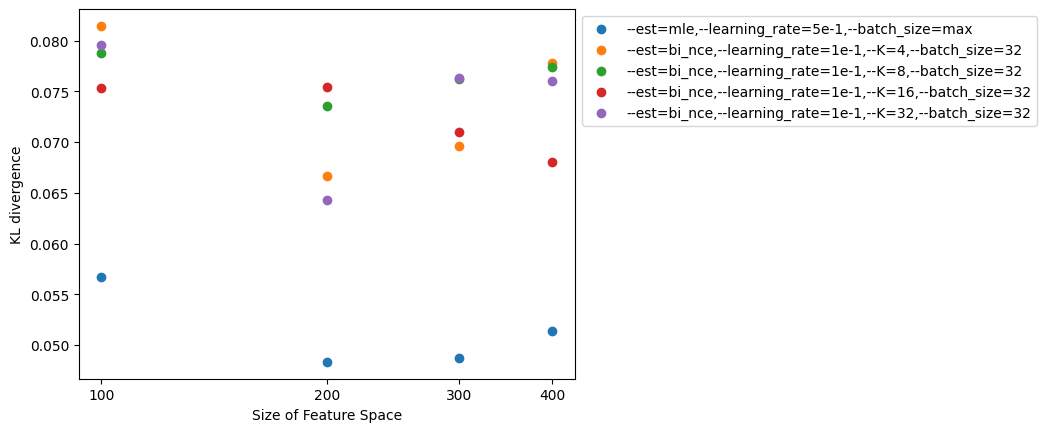

In [ ]:
mx_values = [100, 200, 300, 400]
mx_str = ["--mx="+str(i) for i in mx_values]
var_params = [
    ['--est=mle', '--learning_rate=5e-1', '--batch_size=max'],

    ['--est=bi_nce', '--learning_rate=1e-1', '--K=4','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=8','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=16','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=32','--batch_size=32'],

]
params = [p + ['--n_test=1000', '--d=4', '--n_train=16000', '--mt=4', '--my=100', '--model=multi_softmax', '--patience=20', '--num_epochs=15000'] for p in var_params]

plot_kl_divergence(params, mx_str, mx_values, "Size of Feature Space", var_params, saver)

Finally, let's take a look at how varying the size of mt (the number of possible tasks) affects the KL divergence for mle vs. bi_nce:

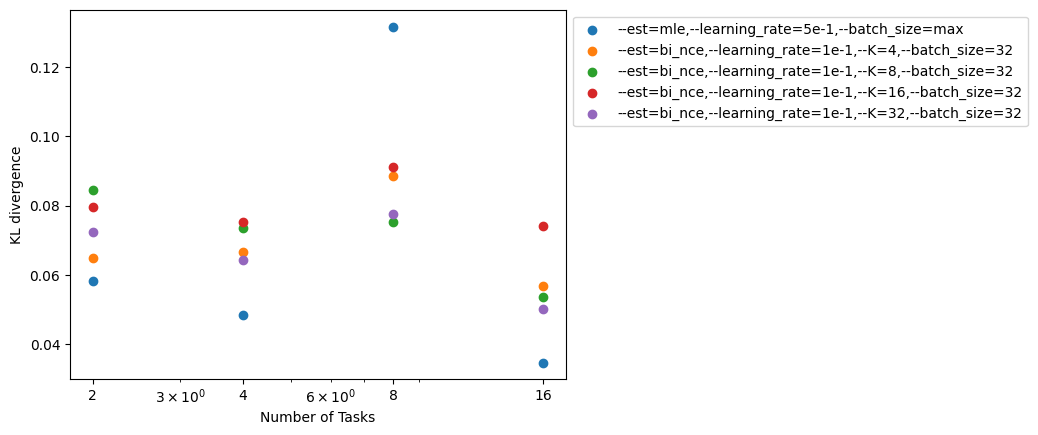

In [ ]:
mt_values = [2, 4, 8, 16]
mt_str = ["--mt="+str(i) for i in mt_values]
var_params = [
    ['--est=mle', '--learning_rate=5e-1', '--batch_size=max'],

    ['--est=bi_nce', '--learning_rate=1e-1', '--K=4','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=8','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=16','--batch_size=32'],
    ['--est=bi_nce', '--learning_rate=1e-1', '--K=32','--batch_size=32'],

]
params = [p + ['--n_test=1000', '--d=4', '--n_train=16000', '--mx=200', '--my=100', '--model=multi_softmax', '--patience=20', '--num_epochs=15000'] for p in var_params]

plot_kl_divergence(params, mt_str, mt_values, "Number of Tasks", var_params, saver)